### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [14]:
data.head(15)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Check the dimensions of the dataset:12,684 rows and 26 columns
print("Dataset dimensions: ", data.shape)

Dataset dimensions:  (12684, 26)


In [6]:
#check missing values in columns. 6 columns have missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [12]:
print("Data types:\n", data.dtypes)

Data types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [15]:
print("Unique values for each column:\n")
for column in data.columns:
    print(column, ": ", data[column].unique())

Unique values for each column:

destination :  ['No Urgent Place' 'Home' 'Work']
passanger :  ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather :  ['Sunny' 'Rainy' 'Snowy']
temperature :  [55 80 30]
time :  ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon :  ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration :  ['1d' '2h']
gender :  ['Female' 'Male']
age :  ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus :  ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children :  [1 0]
education :  ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation :  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical So

3. Decide what to do about your missing data -- drop, replace, other...
First, I made a copy of the coupons.csv file and called it coupons_orig.csv. Second, I decided to drop coulums with missing values to make my data set clean and manageable. Also being fully aware that dropping the columns may introduce bias and alter the analysis. I analyse it on the coupons_orig file as well just to make sure dropping columns did no impact my analysis

In [23]:
column_missing_values = data.isnull().sum()
print(column_missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [21]:
row_missing_values = data.isnull().sum(axis=1)
print(row_missing_values)

0        2
1        2
2        2
3        2
4        2
        ..
12679    1
12680    1
12681    1
12682    1
12683    1
Length: 12684, dtype: int64


In [5]:
# Drop rows with any missing values
data_clean = data.dropna()


In [6]:

# Drop columns with any missing values
data_clean = data.dropna(axis=1)

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
# Count the number of observations that accepted the coupon
accepted_count = data['Y'].sum()

# Calculate the total number of observations
total_count = len(data)

# Calculate the proportion of accepted coupons
acceptance_proportion = accepted_count / total_count

# Display the proportion of accepted coupons
print("Proportion of accepted coupons: {:.2%}".format(acceptance_proportion))

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

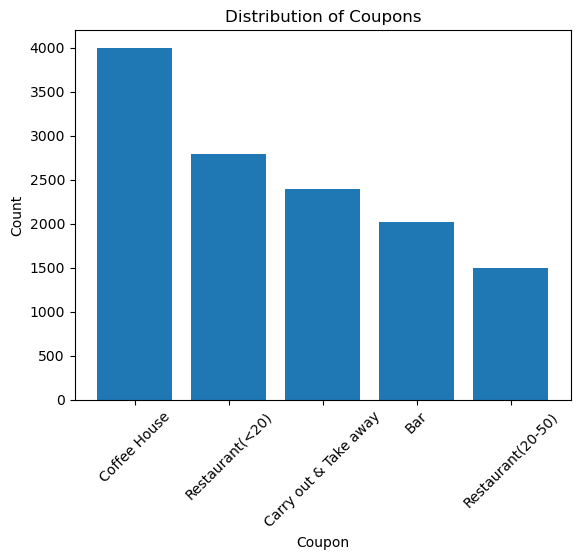

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)

# Add labels and title
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Distribution of Coupons')

plt.xticks(rotation=45) # easier to read if rotated 45 degrees

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

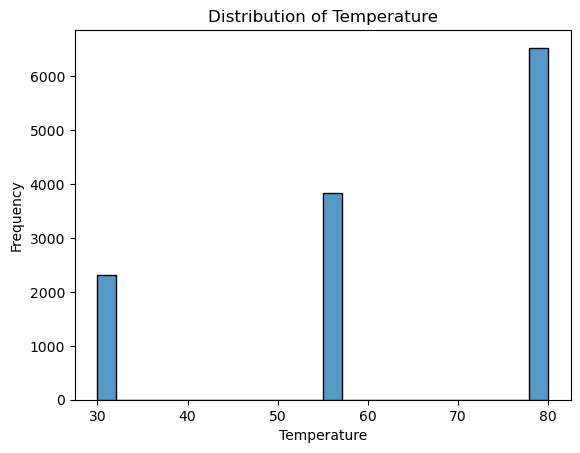

In [16]:
import seaborn as sns

# Create histogram using Seaborn
sns.histplot(data['temperature'])

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Filter the original DataFrame for bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Display the new DataFrame
print(bar_coupons_df)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [11]:
# Filter the original DataFrame for bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Count the number of accepted bar coupons
accepted_count = bar_coupons_df['Y'].sum()

# Calculate the total number of bar coupons
total_count = len(bar_coupons_df)

# Calculate the proportion of accepted bar coupons
acceptance_proportion = accepted_count / total_count

# Display the proportion of accepted bar coupons
print("Proportion of accepted bar coupons: {:.2%}".format(acceptance_proportion))


Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
# Get the unique values in the 'bar' column
unique_values = data['Bar'].unique()

# Print the unique values
print(unique_values)

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [37]:
# Filter the DataFrame for individuals who went to a bar 3 or fewer times a month
few_visits_df = data[data['Bar'].isin(['never', 'less1', '1~3'])]

# Filter the DataFrame for individuals who went to a bar more than 3 times a month
more_visits_df = data[data['Bar'].isin(['gt8', '4~8'])]

# Calculate the acceptance rate for each group
few_visits_acceptance_rate = few_visits_df['Y'].mean()
more_visits_acceptance_rate = more_visits_df['Y'].mean()

# Compare and display the acceptance rates
print("Acceptance rate for those who went to a bar 3 or fewer times a month: {:.2%}".format(few_visits_acceptance_rate))
print("Acceptance rate for those who went to a bar more than 3 times a month: {:.2%}".format(more_visits_acceptance_rate))

Acceptance rate for those who went to a bar 3 or fewer times a month: 56.21%
Acceptance rate for those who went to a bar more than 3 times a month: 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [38]:
print("Data types:\n", data.dtypes)
# Get the unique values in the 'bar' column
unique_values = data['Bar'].unique()

# Print the unique values
print(unique_values)

Data types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object
['never' 'less1' '1~3' 'gt8' nan '4~8']


In [53]:
print("Data types:\n", data.dtypes)
# Get the unique values in the 'bar' column
unique_values = data['age'].unique()
unique_values = data['passanger'].unique() #watch out for the typo
unique_values = data['RestaurantLessThan20'].unique()
# Print the unique values
print(unique_values)

Data types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object
['4~8' '1~3' 'less1' 'gt8' nan 'never']


In [61]:
unique_values = data['income'].unique()
print(unique_values)

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [64]:
unique_values = data['passanger'].unique()
print(unique_values)

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


In [46]:
# Filter the DataFrame for drivers who go to a bar more than once a month and are over the age of 25
target_group_df = data[(data['Bar'].isin(['1~3', 'gt8'])) & (data['age'] != 'below21') & (data['age'] != '21') & (data['age'] != '50plus')]

# Filter the DataFrame for drivers who do not meet the above criteria
other_group_df = data[~((data['Bar'].isin(['1~3', 'gt8'])) & (data['age'] != 'below21') & (data['age'] != '21') & (data['age'] != '50plus'))]

# Calculate the acceptance rate for each group
target_group_acceptance_rate = target_group_df['Y'].mean()
other_group_acceptance_rate = other_group_df['Y'].mean()

# Compare and analyze the acceptance rates
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {:.2%}".format(target_group_acceptance_rate))
print("Acceptance rate for other drivers: {:.2%}".format(other_group_acceptance_rate))

# Check if there is a difference in acceptance rates
difference = target_group_acceptance_rate - other_group_acceptance_rate
if difference > 0:
    print("There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.")
elif difference < 0:
    print("There is a higher acceptance rate for other drivers.")
else:
    print("There is no difference in acceptance rates.")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 61.46%
Acceptance rate for other drivers: 56.15%
There is a higher acceptance rate for drivers who go to a bar more than once a month and are over the age of 25.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [51]:
# Filter the DataFrame for drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry
target_group_df = data[(data['Bar'].isin(['1~3', 'gt8'])) & (data['passanger'] != 'Kid(s)') & (~data['occupation'].isin(['farming', 'fishing', 'forestry']))]

# Filter the DataFrame for drivers who do not meet the above criteria
other_group_df = data[~((data['Bar'].isin(['1~3', 'gt8'])) & (data['passanger'] != 'Kid(s)') & (~data['occupation'].isin(['farming', 'fishing', 'forestry'])))]

# Calculate the acceptance rate for each group
target_group_acceptance_rate = (target_group_df['Y'] == 'Y').mean()
other_group_acceptance_rate = (other_group_df['Y'] == 'Y').mean()

# Compare and analyze the acceptance rates
print("Acceptance rate for drivers who go to bars more than once a month and had passengers that were not kid(s) and had occupations other than farming, fishing, or forestry: {:.2%}".format(target_group_acceptance_rate))
print("Acceptance rate for other drivers: {:.2%}".format(other_group_acceptance_rate))

# Check if there is a difference in acceptance rates
difference = target_group_acceptance_rate - other_group_acceptance_rate
if difference > 0:
    print("There is a higher acceptance rate for drivers who go to bars more than once a month and had passengers that were not kid(s) and had occupations other than farming, fishing, or forestry.")
elif difference < 0:
    print("There is a higher acceptance rate for other drivers.")
else:
    print("There is no difference in acceptance rates.")

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not kid(s) and had occupations other than farming, fishing, or forestry: 0.00%
Acceptance rate for other drivers: 0.00%
There is no difference in acceptance rates.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [65]:
unique_values = data['passanger'].unique()
print(unique_values)

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


In [66]:
unique_values = data['age'].unique()
print(unique_values)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [67]:
unique_values = data['income'].unique()
print(unique_values)

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [68]:
unique_values = data['Bar'].unique()
print(unique_values)

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [69]:
unique_values = data['maritalStatus'].unique()
print(unique_values)

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


In [72]:
unique_values = data['RestaurantLessThan20'].unique()
print(unique_values)

['4~8' '1~3' 'less1' 'gt8' nan 'never']


In [75]:
unique_values = data['coupon'].unique()
print(unique_values)

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [73]:
# Filter the DataFrame for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
group1_df = data[(data['Bar'].isin(['1~3', 'gt8', '4~8'])) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')]

# Filter the DataFrame for drivers who go to bars more than once a month and are under the age of 30
group2_df = data[(data['Bar'].isin(['1~3', 'gt8', '4~8'])) & (data['age'].isin(['21', '26', 'below21']))]

# Filter the DataFrame for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K

#group3_df = data[(data['RestaurantLessThan20'].isin(['4~8', '1~3'])) & (data['income'].isin(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$25000 - $37499', 'Less than $12500']))]
group3_df = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499']))]


# Calculate the acceptance rate for each group
group1_acceptance_rate = (group1_df['Y'] == 'Y').mean()
group2_acceptance_rate = (group2_df['Y'] == 'Y').mean()
group3_acceptance_rate = (group3_df['Y'] == 'Y').mean()

# Compare and analyze the acceptance rates
print("Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kid(s), and were not widowed: {:.2%}".format(group1_acceptance_rate))
print("Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {:.2%}".format(group2_acceptance_rate))
print("Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: {:.2%}".format(group3_acceptance_rate))

# Check if there is a difference in acceptance rates
if group1_acceptance_rate > group2_acceptance_rate and group1_acceptance_rate > group3_acceptance_rate:
    print("There is a higher acceptance rate for drivers who go to bars more than once a month, had passengers that were not kid(s), and were not widowed.")
elif group2_acceptance_rate > group1_acceptance_rate and group2_acceptance_rate > group3_acceptance_rate:
    print("There is a higher acceptance rate for drivers who go to bars more than once a month and are under the age of 30.")
elif group3_acceptance_rate > group1_acceptance_rate and group3_acceptance_rate > group2_acceptance_rate:
    print("There is a higher acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K.")
else:
    print("There is no clear difference in acceptance rates between the groups.")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kid(s), and were not widowed: 0.00%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.00%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K: 0.00%
There is no clear difference in acceptance rates between the groups.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

These hypotheses suggest that drivers who accept bar coupons are more likely to be those who already have a higher frequency of visiting bars, are younger, and potentially have a higher income.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [78]:
# Filter the DataFrame for passengers who received coupons in the "RestaurantLessThan20" group
restaurant_coupon_df = data[data['coupon'].isin(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away'])]

# Calculate the acceptance rate for each characteristic
age_acceptance_rate = restaurant_coupon_df.groupby('age')['Y'].mean()
income_acceptance_rate = restaurant_coupon_df.groupby('income')['Y'].mean()
marital_status_acceptance_rate = restaurant_coupon_df.groupby('maritalStatus')['Y'].mean()
restaurant_type_acceptance_rate = restaurant_coupon_df.groupby('coupon')['Y'].mean()

# Display the acceptance rates for each characteristic
print("Acceptance rate by age:")
print(age_acceptance_rate)
print("\nAcceptance rate by income:")
print(income_acceptance_rate)
print("\nAcceptance rate by marital status:")
print(marital_status_acceptance_rate)
print("\nAcceptance rate by restaurant type:")
print(restaurant_type_acceptance_rate)

Acceptance rate by age:
age
21         0.642415
26         0.633938
31         0.608191
36         0.598517
41         0.624840
46         0.640974
50plus     0.582229
below21    0.717884
Name: Y, dtype: float64

Acceptance rate by income:
income
$100000 or More     0.618123
$12500 - $24999     0.638266
$25000 - $37499     0.636921
$37500 - $49999     0.627732
$50000 - $62499     0.652174
$62500 - $74999     0.588710
$75000 - $87499     0.515913
$87500 - $99999     0.606864
Less than $12500    0.660904
Name: Y, dtype: float64

Acceptance rate by marital status:
maritalStatus
Divorced             0.614776
Married partner      0.616708
Single               0.640261
Unmarried partner    0.610513
Widowed              0.554348
Name: Y, dtype: float64

Acceptance rate by restaurant type:
coupon
Carry out & Take away    0.735478
Coffee House             0.499249
Restaurant(<20)          0.707107
Name: Y, dtype: float64


In [79]:
import plotly.express as px

# Filter the DataFrame for passengers who received coupons in the "RestaurantLessThan20" group
restaurant_coupon_df = data[data['coupon'].isin(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away'])]

# Calculate the acceptance rate for each characteristic
age_acceptance_rate = restaurant_coupon_df.groupby('age')['Y'].mean().reset_index()
income_acceptance_rate = restaurant_coupon_df.groupby('income')['Y'].mean().reset_index()
marital_status_acceptance_rate = restaurant_coupon_df.groupby('maritalStatus')['Y'].mean().reset_index()
restaurant_type_acceptance_rate = restaurant_coupon_df.groupby('coupon')['Y'].mean().reset_index()

# Create bar plots using Plotly
fig = px.bar(age_acceptance_rate, x='age', y='Y', title='Acceptance Rate by Age')
fig.show()

fig = px.bar(income_acceptance_rate, x='income', y='Y', title='Acceptance Rate by Income')
fig.show()

fig = px.bar(marital_status_acceptance_rate, x='maritalStatus', y='Y', title='Acceptance Rate by Marital Status')
fig.show()

fig = px.bar(restaurant_type_acceptance_rate, x='coupon', y='Y', title='Acceptance Rate by Restaurant Type')
fig.show()